# Retail Project
- Nicolas Brooks
- Professor
- Drexel University BUSN 499

In [2]:
import numpy as np
import pandas as pd
import nltk

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Directory
#from subprocess import check_output
#print(check_output(["ls", "../NLP"]).decode("utf8"))

In [3]:
# Read
data = pd.ExcelFile("retail dataset.xlsx")
data.sheet_names

['Sheet1']

In [4]:
df = data.parse("Sheet1", header=1)

In [5]:
df = df.drop(["Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21","Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26"], axis = 1)

In [6]:
df.head()

,STERLINGEXTERNALALIAS,AGE,IID,REVIEW_ID,TITLE,REVIEW_TEXT,RATING,RATING_RANGE,RECOMMENDED_IND,NUM_FEEDBACKS,NUM_POSITIVE_FEEDBACKS,NUM_NEGATIVE_FEEDBACKS,DIVISION_ID,DIVISION_NAME,DEPARTMENT_ID,DEPARTMENT_NAME,CLASS_ID,CLASS_NAME
0,40175747,33,100008000000000,73990099,NaN,absolutely wonderful - silky and sexy and comf...,4,5,1,0,0,0,42.0,ANTHRO INTIMATES (NA),414.0,ANTHRO. WOMEN'S INTIMATE (NA),4140.0,INTIMATES - ANTHRO (NA)
1,4130200000000,34,100000000000000,67591147,NaN,Love this dress! It's sooo pretty. I happene...,5,5,1,4,4,0,41.0,ANTHRO. WOMEN'S DIVISION (NA),413.0,ANTHRO. WOMEN'S OTHER (NA),4130.0,DRESSES - ANTHRO. (NA)
2,4130080000000,60,100000000000000,56579841,Some major design flaws,I had such high hopes for this dress and reall...,3,5,0,0,0,0,41.0,ANTHRO. WOMEN'S DIVISION (NA),413.0,ANTHRO. WOMEN'S OTHER (NA),4130.0,DRESSES - ANTHRO. (NA)
3,4123200000000,50,100001000000000,56445604,My Favorite Buy!,"I love, love, love this jumpsuit. It's fun, fl...",5,5,1,0,0,0,49.0,ANTHRO. MISC. DIVISION (NA),492.0,PETITES (NA),4927.0,PANTS - PETITES (NA)
4,4110530000000,47,100001000000000,73214993,Flattering shirt,This shirt is very flattering to all due to th...,5,5,1,6,6,0,41.0,ANTHRO. WOMEN'S DIVISION (NA),411.0,ANTHRO. WOMEN'S TOPS (NA),4110.0,BLOUSES - ANTHRO. (NA)


In [7]:
df.describe()

,AGE,IID,REVIEW_ID,RATING,RATING_RANGE,RECOMMENDED_IND,NUM_FEEDBACKS,NUM_POSITIVE_FEEDBACKS,NUM_NEGATIVE_FEEDBACKS,DIVISION_ID,DEPARTMENT_ID,CLASS_ID
count,23486.000000,2.348600e+04,2.348600e+04,23486.000000,23486.0,23486.000000,23486.000000,23486.000000,23486.0,23472.000000,23472.000000,23472.000000
mean,43.198544,1.000069e+14,6.514529e+07,4.196032,5.0,0.822362,2.535936,2.535936,0.0,43.831544,439.801508,4399.362986
std,12.279544,1.150606e+10,6.745848e+06,1.110031,0.0,0.382216,5.702202,5.702202,0.0,3.766613,37.979309,381.858922
min,18.000000,1.000000e+14,5.196655e+07,1.000000,5.0,0.000000,0.000000,0.000000,0.0,41.000000,411.000000,4110.000000
25%,34.000000,1.000000e+14,5.875902e+07,4.000000,5.0,1.000000,0.000000,0.000000,0.0,41.000000,411.000000,4113.000000
50%,41.000000,1.000010e+14,6.509622e+07,5.000000,5.0,1.000000,1.000000,1.000000,0.0,41.000000,413.000000,4130.000000
75%,52.000000,1.000080e+14,7.193795e+07,5.000000,5.0,1.000000,3.000000,3.000000,0.0,49.000000,492.000000,4921.000000
max,99.000000,1.000420e+14,7.517850e+07,5.000000,5.0,1.000000,122.000000,122.000000,0.0,49.000000,492.000000,4939.000000


In [8]:
df[["TITLE","REVIEW_TEXT"]] [:10]

,TITLE,REVIEW_TEXT
0,NaN,absolutely wonderful - silky and sexy and comf...
1,NaN,Love this dress! It's sooo pretty. I happene...
2,Some major design flaws,I had such high hopes for this dress and reall...
3,My Favorite Buy!,"I love, love, love this jumpsuit. It's fun, fl..."
4,Flattering shirt,This shirt is very flattering to all due to th...
5,Not for the very petite,"I love Tracy Reese dresses, but this one is no..."
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...
7,"SHimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an..."
8,Flattering,I love this dress. I usually get an XS but It ...
9,Such a fun dress!,"I'm 5""5' and 125 lbs. I ordered the S petite t..."


## Combined Text

In [9]:
txt = df.REVIEW_TEXT.str.lower().str.cat(sep=' ')

In [10]:
txt[:500]

'absolutely wonderful - silky and sexy and comfortable love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found thi'

In [11]:
import string
import nltk
from nltk.tokenize import RegexpTokenizer
import re

tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(txt)

In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]

In [13]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stem = [ps.stem(w) for w in words]

In [14]:
stem_dist = nltk.FreqDist(stem)
stem_dist.most_common(15)

[('dress', 12187),
 ('fit', 11512),
 ('love', 11395),
 ('size', 10721),
 ('look', 9354),
 ('top', 8375),
 ('wear', 8075),
 ('like', 7875),
 ('color', 7300),
 ('great', 6118),
 ('5', 5550),
 ('would', 5109),
 ('order', 5014),
 ('fabric', 4893),
 ('small', 4753)]

In [15]:
word_dist = nltk.FreqDist(words)

In [16]:
top_N = 15
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

      Word  Frequency
0    dress      10567
1     love       8951
2     size       8772
3      top       7418
4      fit       7325
5     like       7149
6     wear       6439
7    great       6117
8        5       5550
9    would       5109
10  fabric       4798
11   small       4729
12   color       4605
13    look       4039
14  really       3925


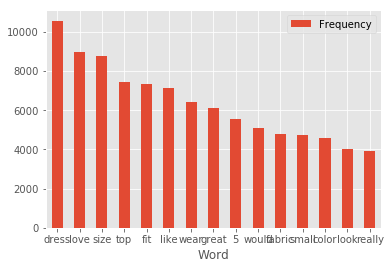

In [17]:
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)

## Tokenize

In [18]:
df['text'] = df.REVIEW_TEXT.astype(str)
print(df['text'][0])
type(df['text'])

absolutely wonderful - silky and sexy and comfortable


pandas.core.series.Series

In [19]:
df['tokens'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
df['tokens'] = df.tokens.apply(lambda x: [w.lower() for w in x])

In [20]:
df['tokens'][:5]

0    [absolutely, wonderful, -, silky, and, sexy, a...
1    [love, this, dress, !, it, 's, sooo, pretty, ....
2    [i, had, such, high, hopes, for, this, dress, ...
3    [i, love, ,, love, ,, love, this, jumpsuit, .,...
4    [this, shirt, is, very, flattering, to, all, d...
Name: tokens, dtype: object

## Stopword

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [21]:
df["filtered"]= df['tokens'].apply(lambda x:[w for w in x if not w in stop_words])

In [22]:
df['filtered'][:5]

0    [absolutely, wonderful, -, silky, sexy, comfor...
1    [love, dress, !, 's, sooo, pretty, ., happened...
2    [high, hopes, dress, really, wanted, work, ., ...
3    [love, ,, love, ,, love, jumpsuit, ., 's, fun,...
4    [shirt, flattering, due, adjustable, front, ti...
Name: filtered, dtype: object

## Stemming

In [23]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [24]:
df["filtered"][0]

['absolutely', 'wonderful', '-', 'silky', 'sexy', 'comfortable']

In [31]:
[ps.stem(w) for w in df["filtered"][0]]

['absolut', 'wonder', '-', 'silki', 'sexi', 'comfort']

In [29]:
for w in df["filtered"][0]:
    print(ps.stem(w))

absolut
wonder
-
silki
sexi
comfort


In [33]:
df['stemmed'] = df["filtered"].apply(lambda x: [ps.stem(w) for w in x])

In [36]:
df['stemmed'][:15]

0            [absolut, wonder, -, silki, sexi, comfort]
1     [love, dress, !, 's, sooo, pretti, ., happen, ...
2     [high, hope, dress, realli, want, work, ., ini...
3     [love, ,, love, ,, love, jumpsuit, ., 's, fun,...
4     [shirt, flatter, due, adjust, front, tie, ., p...
5     [love, traci, rees, dress, ,, one, petit, ., 5...
6     [ade, basket, hte, last, mintu, see, would, lo...
7     [order, carbon, store, pick, ,, ton, stuff, (,...
8     [love, dress, ., usual, get, xs, run, littl, s...
9     ['m, 5, '', 5, ', 125, lb, ., order, petit, ma...
10    [dress, run, small, esp, zipper, area, run, .,...
11              [dress, perfect, !, pretti, flatter, .]
12    [find, reliant, review, written, savvi, shoppe...
13    [bought, black, xs, go, larkspur, midi, dress,...
14    [nice, choic, holiday, gather, ., like, length...
Name: stemmed, dtype: object

## To Do

- Categorize by Rank
- Combine all reviews and analyze